In [3]:
import os
os.chdir("/home/haok/MoE-Research")

import pickle
from pathlib import Path
from typing import List, Tuple
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

base = Path("results/router-saturation")
assert base.is_dir()


In [8]:
def human_format(x, pos):
    return f"{x * 100:.0f}%"

def plot(glob: List[List[Path]], nrows: int, ncols: int):
    sns.set_theme(style="whitegrid")
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, 5), sharey=True)
    axs = axs.flatten()

    packs: List[Tuple[Path, List[float]]] = []
    steps = np.arange(0.1, 1.01, 0.1)
    steps = np.delete(steps, 2)
    for files in glob:
        items = []
        files = sorted(files, key=lambda x: int(x.parts[-2]))
        for file in files:
            with file.open("rb") as f:
                record = np.array(pickle.load(f))
                record = np.delete(record, -2) if len(record) > 10 else record
                record = np.delete(record, 2)
                items.append((file, record))
        packs.append(items)

    for ax, items in zip(axs, packs):
        for file, record in items:
            ax.plot(steps, record, marker='o', label=f"L{file.parts[-2]}")

        scale, topk = file.parts[2], file.parts[4]
        scale = scale.replace("flame-moe", "FLAME-MoE")
        scale = scale.replace("1.7b", "1.7B-10.3B")
        scale = scale.replace("721m", "721M-3.8B")
        scale = scale.replace("290m", "290M-1.3B")
        topk = topk.removesuffix(".pkl")
        ax.set_title(f"{scale}, top-{topk}", fontsize=12)
        ax.set_xlabel("Training Stage", fontsize=12)
        if ax == axs[0]: 
            ax.set_ylabel("Router Saturation", fontsize=12)

        ax.tick_params(axis='both', labelsize=12)
        ax.xaxis.set_major_formatter(FuncFormatter(human_format))
        ax.yaxis.set_major_formatter(FuncFormatter(human_format))
        ax.grid(False)

        if ax == axs[-1]:
            ax.legend(loc='lower right', fontsize=10, frameon=False, ncol=3)

    plt.tight_layout()
    plt.show()


router saturation, across scales, under top-1


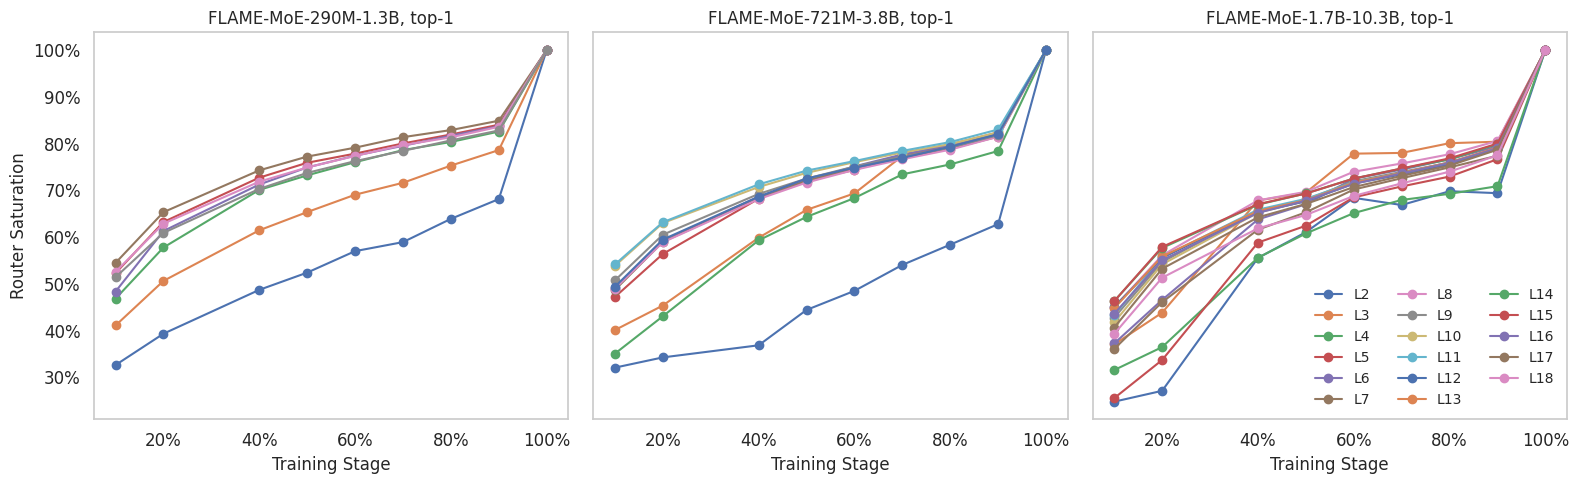

router saturation, across scales, under top-6


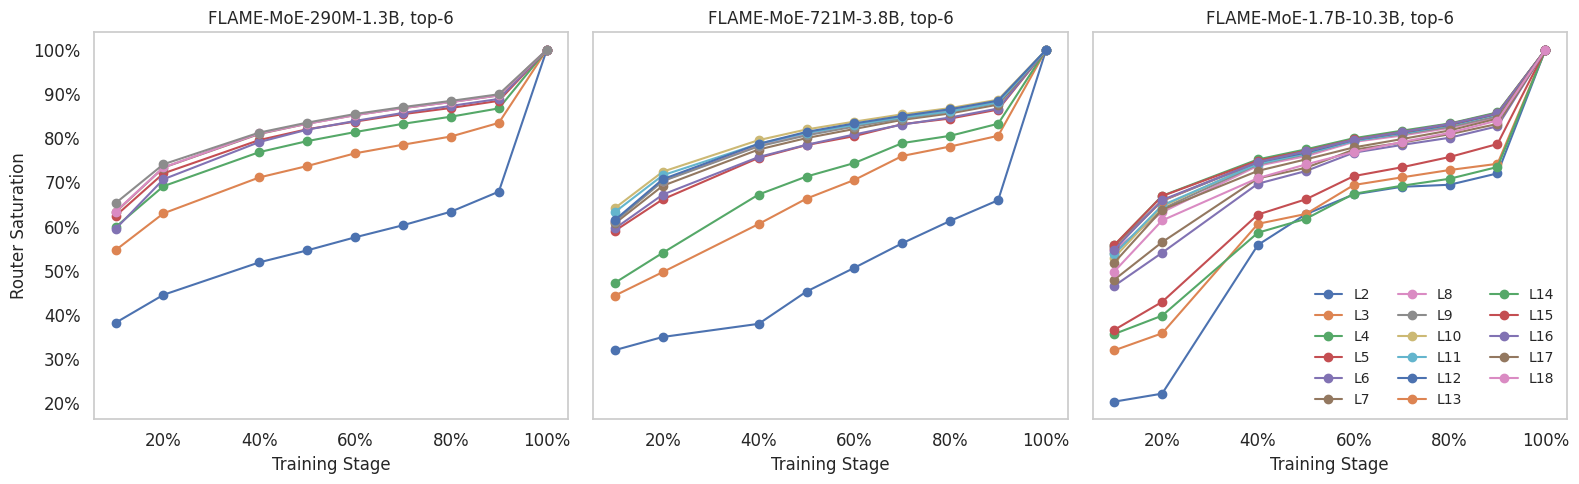

In [10]:
print("router saturation, across scales, under top-1")
glob = list(map(list, [base.glob("*290m/*/1.pkl"), base.glob("*721m/*/1.pkl"), base.glob("*1.7b/*/1.pkl")]))
plot(glob, 1, 3)

print("router saturation, across scales, under top-6")
glob = list(map(list, [base.glob("*290m/*/6.pkl"), base.glob("*721m/*/6.pkl"), base.glob("*1.7b/*/6.pkl")]))
plot(glob, 1, 3)
